In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
os.listdir()

['EDA.ipynb',
 'try.csv',
 'dataset_description.pdf',
 'Tuning_parameter.py',
 '.DS_Store',
 'Record',
 'Attachment',
 'test.csv',
 '__pycache__',
 'Test.py',
 'Image',
 'Threshold.py',
 'Model.py',
 'REF.ipynb',
 'Preprocessing.py',
 'train.csv',
 '.ipynb_checkpoints',
 'Main.py',
 'Model.ipynb',
 'test.ipynb',
 'Submission']

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train['Week'] = train['locdt'].apply(lambda x : x%7)

In [4]:
df = train.groupby(['locdt'])['fraud_ind'].count().reset_index()

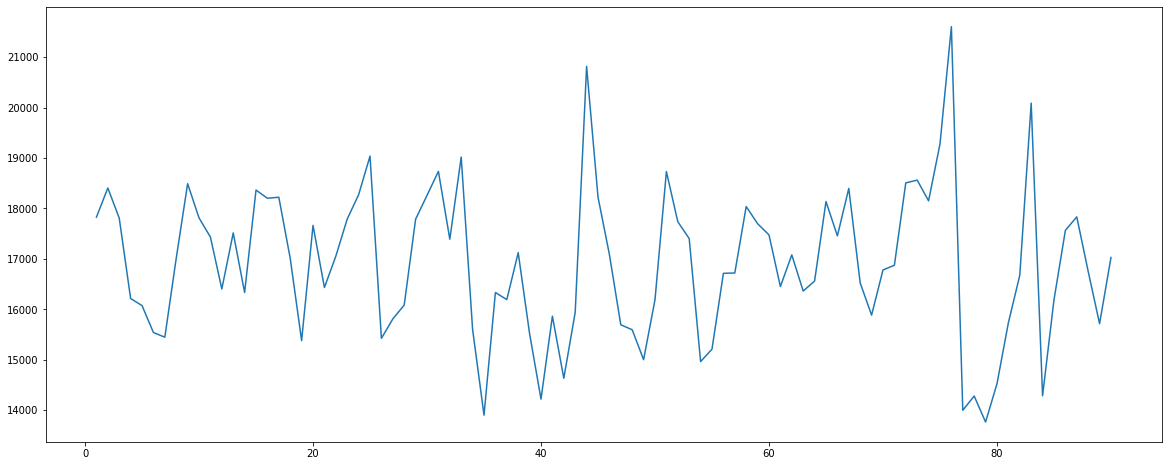

In [5]:
fig = plt.figure(figsize=(20,8))
plt.plot(range(1,91), df['fraud_ind'])

<BarContainer object of 7 artists>

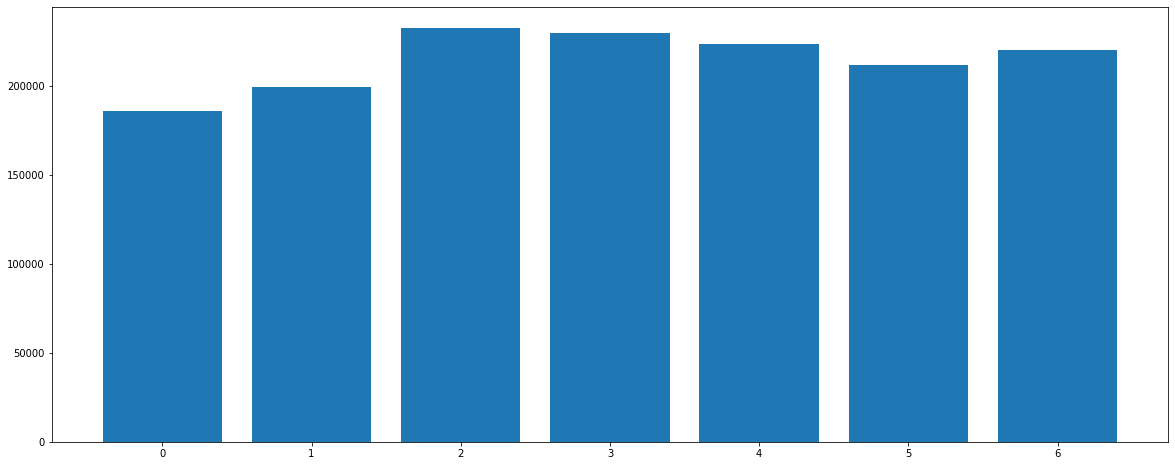

In [6]:
df = train[train.locdt > 1]
df = df.groupby(['Week'])['fraud_ind'].count().reset_index()
fig = plt.figure(figsize=(20,8))
plt.bar(df['Week'], df['fraud_ind'])

<BarContainer object of 7 artists>

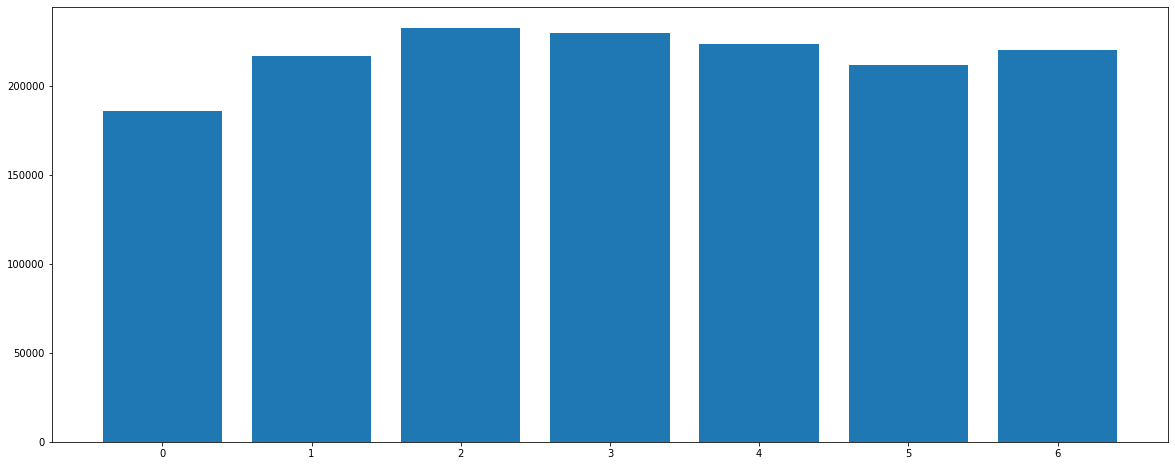

In [7]:
df = train[train.locdt < 120]
df = df.groupby(['Week'])['fraud_ind'].count().reset_index()
fig = plt.figure(figsize=(20,8))
plt.bar(df['Week'], df['fraud_ind'])

In [16]:
mp = train.groupby('bacno')['cano'].agg(['nunique'])
train['nunique'] = train.bacno.map(mp['nunique'])

In [18]:
train.groupby(['nunique'])['fraud_ind'].agg(['mean', 'count'])

,mean,count
nunique,,
1,0.005886,847295
2,0.023767,415740
3,0.023066,146447
4,0.020445,59967
5,0.015431,27607
6,0.016594,12595
7,0.023369,4707
8,0.010209,4212
9,0.010967,2006


In [23]:
from scipy import stats
def _get_mode(x):
    return stats.mode(x.values)[0][0]


In [26]:
train['mode'] = train.groupby(['cano'])['scity'].transform(_get_mode)

In [28]:
len(train[train['mode'] != train['scity']]), len(train[train['mode'] == train['scity']]) 

(543977, 977810)

In [29]:
train[train['mode'] != train['scity']]['fraud_ind'].mean()

0.019300448364544826

In [30]:
train[train['mode'] == train['scity']]['fraud_ind'].mean()

0.010079667829128358